In [1]:
from keybert import KeyBERT
import numpy as np

c:\Users\Pc\AppData\Local\pypoetry\Cache\virtualenvs\eve-project-13oD41wO-py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
kw_model = KeyBERT('all-MiniLM-L6-v2')

In [3]:
# open txt file
with open(r'C:\Users\Pc\Documents\Talk_to_Eve_mvp\documents\conversations_examples\conversations.txt', 'r') as file:
    text = file.read()

text = text.split('\n')
# delete empty lines
text = [x for x in text if x]
folders_idx = [i for i, x in enumerate(text) if x.startswith('# Folder')]

In [4]:
pages = np.array([folders_idx[i+1] - folders_idx[i] for i in range(len(folders_idx)-1)])
id_max, max_num =  np.argmax(pages), np.max(pages)
print(id_max, max_num)

257 33


In [5]:
text[folders_idx[257]:folders_idx[258]][0]

'# Folder: Depression - Example 1 OR 2 OR ... OR 6'

In [6]:
conversation = text[folders_idx[257]:folders_idx[258]][1:]

In [7]:
conversation[:5]

["User: Hey EVE. I'm feeling really down lately and I don't know what to do.",
 "EVE: I'm sorry to hear that. What's been going on?",
 "User: I don't know. Everything just seems pointless. I don't see the point in doing anything.",
 'EVE: That sounds very difficult. I can understand why you would feel that way.',
 "User: Yeah. I just don't know what to do. I feel like I'm stuck."]

In [22]:
from keyphrase_vectorizers import KeyphraseCountVectorizer

In [26]:
row_kw = []
row_kw_kf = []
emb = []
for row in conversation:
    if row.startswith('User:'):
        model_kw = kw_model.extract_keywords(row, keyphrase_ngram_range=(1, 3), stop_words=['eve', 'user'], use_mmr=True, diversity=0.5)
        row_kw.extend([i[0] for i in model_kw if i[1] > 0.4])
        embeddings = kw_model.extract_embeddings(row_kw[-1])
        emb.extend([i[0] for i in embeddings])
        model_kw_kf = kw_model.extract_keywords(row, stop_words=['eve', 'user'], vectorizer=KeyphraseCountVectorizer(stop_words=['eve', 'user']))
        row_kw_kf.extend([i[0] for i in model_kw_kf if i[1] > 0.4])
    

ValueError: Empty keyphrases. Perhaps the documents do not contain keyphrases that match the 'pos_pattern' parameter, only contain stop words, or you set the 'min_df'/'max_df' parameters too strict.

In [24]:
row_kw

['feeling really down',
 'just seems pointless',
 'pointless don',
 'doing anything',
 'stuck',
 'feel so lost',
 'making plan',
 'it will help',
 'okay ll try',
 'don know',
 'don know',
 'can call jamie',
 'call',
 'feeling little better',
 'have plan',
 'keep the plan',
 'plan going',
 'try to keep',
 'have an assignment',
 'topic should be',
 'so many ideas',
 'is the strongest',
 'not an essay',
 'list of ideas',
 'okay will try',
 'try that']

In [25]:
row_kw_kf

['eve',
 'user',
 'user',
 'plan',
 'user',
 'user',
 'user',
 'user',
 'jamie',
 'thanks eve',
 'plan',
 'user',
 'assignment',
 'topic',
 'many ideas',
 'essay',
 'ideas',
 'user']

In [9]:
conversation

["User: Hey EVE. I'm feeling really down lately and I don't know what to do.",
 "EVE: I'm sorry to hear that. What's been going on?",
 "User: I don't know. Everything just seems pointless. I don't see the point in doing anything.",
 'EVE: That sounds very difficult. I can understand why you would feel that way.',
 "User: Yeah. I just don't know what to do. I feel like I'm stuck.",
 "EVE: Let's see if we can brainstorm some things that might help you feel better. What do you think might help?",
 "User: I don't know. I just feel so lost.",
 'EVE: Okay. Sometimes when people are feeling lost, it helps to have a plan. Do you think having a plan might help you feel better?',
 "User: I don't know. I don't really see the point in making a plan if I don't know what I'm doing.",
 "EVE: That's understandable. But sometimes, even if we don't know what we're doing, having a plan can help us feel better because it gives us a sense of control. And sometimes, when we feel lost, all we need is a littl

In [10]:
row_kw

['feeling really down',
 'just seems pointless',
 'pointless don',
 'doing anything',
 'stuck',
 'feel so lost',
 'making plan',
 'it will help',
 'okay ll try',
 'don know',
 'don know',
 'can call jamie',
 'call',
 'feeling little better',
 'have plan',
 'keep the plan',
 'plan going',
 'try to keep',
 'have an assignment',
 'topic should be',
 'so many ideas',
 'is the strongest',
 'not an essay',
 'list of ideas',
 'okay will try',
 'try that']

In [18]:
from transformers import pipeline

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)


config.json: 100%|██████████| 1.92k/1.92k [00:00<?, ?B/s]
c:\Users\Pc\AppData\Local\pypoetry\Cache\virtualenvs\eve-project-13oD41wO-py3.10\lib\site-packages\huggingface_hub\file_download.py:138: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Pc\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development

model.safetensors: 100%|██████████| 499M/499M [00:37<00:00, 1

In [20]:
classifier(row_kw[0])

[[{'label': 'sadness', 'score': 0.5446630120277405},
  {'label': 'disappointment', 'score': 0.30761680006980896},
  {'label': 'neutral', 'score': 0.08845043927431107},
  {'label': 'annoyance', 'score': 0.029468994587659836},
  {'label': 'nervousness', 'score': 0.019282324239611626},
  {'label': 'realization', 'score': 0.01518035028129816},
  {'label': 'approval', 'score': 0.014492638409137726},
  {'label': 'disapproval', 'score': 0.012873281724750996},
  {'label': 'caring', 'score': 0.009609888307750225},
  {'label': 'remorse', 'score': 0.00871024839580059},
  {'label': 'joy', 'score': 0.007714433129876852},
  {'label': 'grief', 'score': 0.006158785428851843},
  {'label': 'embarrassment', 'score': 0.004113135393708944},
  {'label': 'relief', 'score': 0.003955792170017958},
  {'label': 'anger', 'score': 0.003185177454724908},
  {'label': 'admiration', 'score': 0.0030856614466756582},
  {'label': 'fear', 'score': 0.003051792737096548},
  {'label': 'optimism', 'score': 0.00285695237107574

In [11]:
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
# calculate cosine similarity all with all
cosine_matrix = np.zeros((len(emb), len(emb)))
adyacency_matrix = np.zeros((len(emb), len(emb)))
for i in range(len(emb)):
    for j in range(len(emb)):
        cs = cosine_similarity([emb[i]], [emb[j]])[0][0]
        cosine_matrix[i][j] = cs
        if cs > 0.4 and i != j:
            adyacency_matrix[i][j] = 1

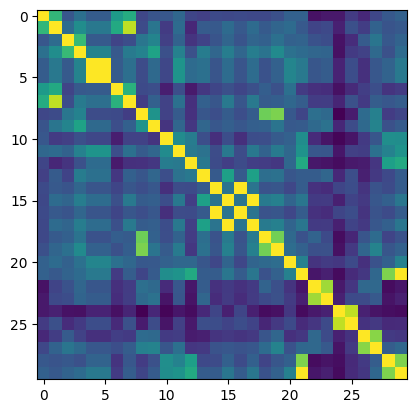

In [13]:
import matplotlib.pyplot as plt

plt.imshow(cosine_matrix)

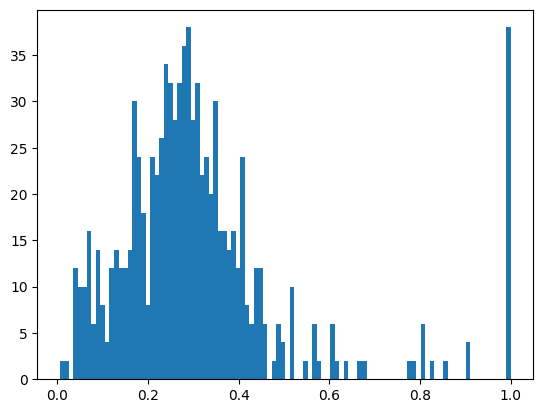

In [14]:
# plot histogram
plt.hist(cosine_matrix.flatten(), bins=100)
plt.show()

In [15]:
import networkx as nx

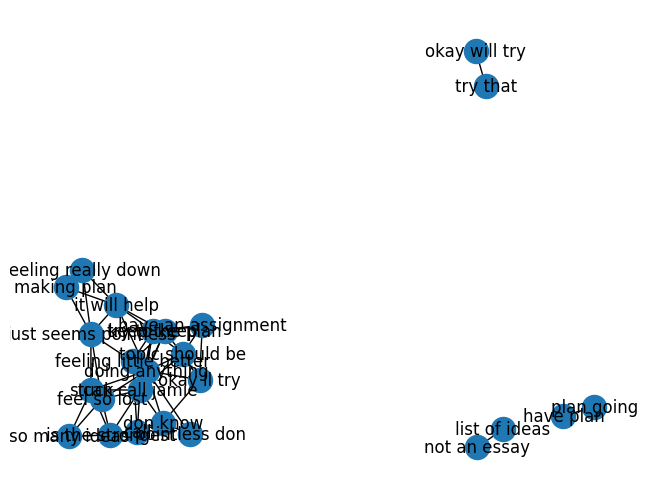

In [16]:
# Crear un grafo vacío
grafo = nx.Graph()

# Agregar nodos al grafo
for i, nodo in enumerate(row_kw):
    grafo.add_node(nodo)

# Agregar bordes (aristas) al grafo basado en la matriz de adyacencia
for i in range(len(row_kw)):
    for j in range(len(row_kw)):
        if adyacency_matrix[i][j] == 1:
            grafo.add_edge(row_kw[i], row_kw[j])

# Dibujar el grafo
nx.draw(grafo, with_labels=True)
plt.show()

In [17]:
import plotly.graph_objects as go
# Generar posiciones de los nodos para la representación en Plotly
pos = nx.spring_layout(grafo)

# Obtener las posiciones x, y de los nodos
posiciones_x = [pos[nodo][0] for nodo in grafo.nodes()]
posiciones_y = [pos[nodo][1] for nodo in grafo.nodes()]

# Crear una lista con las aristas para Plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Agregar las aristas al trace de Plotly
for edge in grafo.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

# Crear el trace de los nodos para Plotly
node_trace = go.Scatter(
    x=posiciones_x,
    y=posiciones_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Lista para almacenar la información de los nodos
node_text = []

# Agregar información sobre los nodos al trace de Plotly
for node in grafo.nodes():
    connections = len(list(grafo.neighbors(node)))
    node_info = f'Node: {node}<br># of connections: {connections}'
    node_text.append(node_info)
    node_trace['marker']['color'] += tuple([connections])

# Asignar la lista de texto de nodos al trace de Plotly
node_trace['text'] = node_text

# Crear la figura de Plotly
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Interactive Network Graph using Plotly',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text='Python code: <a href="https://plot.ly/ipython-notebooks/network-graphs/"> plot.ly/ipython-notebooks/network-graphs/</a>',
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

# Mostrar la figura interactiva de Plotly
fig.show()

In [17]:
# get keywords
keywords = kw_model.extract_keywords(text[54], keyphrase_ngram_range=(1, 2), stop_words=None, use_mmr=True, diversity=0.7)

In [16]:
text[54]

"User: I guess you're right."

In [18]:
keywords

[('re right', 0.4814),
 ('user guess', 0.4615),
 ('user', 0.4477),
 ('guess you', 0.3089),
 ('you re', 0.1949)]

In [12]:
kw_model.extract_keywords(text[55], keyphrase_ngram_range=(1, 2))

[('single ashamed', 0.6685),
 ('embarrassed single', 0.6171),
 ('adults single', 0.5721),
 ('single', 0.4794),
 ('ashamed', 0.4537)]

In [28]:
# read csv file
import pandas as pd
import os

files = os.listdir('eve_project\documents\Keywords')

dfs = []
for file in files:
    dfs.append(pd.read_csv('eve_project\documents\Keywords\\' + file, sep='\t'))

df = pd.concat(dfs)


In [29]:
df

,Node Name,Parent Node,Tags
0,Dreams,Dreams,#Dreams
1,Career Goals,Dreams,#CareerGoals
2,Travel,Dreams,#Travel
3,Relationships,Dreams,#Relationships
4,Personal Growth,Dreams,#PersonalGrowth
...,...,...,...
43,Chat Messages,Communications,#ChatMessages
44,Documents,Work,#Documents
45,Contracts,Documents,#Contracts
46,Reports,Documents,#Reports


In [36]:
candidates = df['Node Name'].values.tolist()

In [33]:
text[62]

"User: Hey EVE! I'm struggling today because I'm feeling really lonely. I've been single for a while now and I'm starting to feel like I'll never find love."

In [38]:
kw_model.extract_keywords(text[62], keyphrase_ngram_range=(1, 2), stop_words=None, use_mmr=True, diversity=0.7)

[('find love', 0.6211),
 ('eve struggling', 0.3817),
 ('user hey', 0.2417),
 ('never', 0.0886),
 ('like ll', -0.0005)]

In [45]:
kw_model.extract_keywords(text[62], keyphrase_ngram_range=(1, 2), stop_words=['eve', 'user'], use_mmr=True, diversity=0.5)

[('find love', 0.6211),
 ('really lonely', 0.5494),
 ('been single', 0.5454),
 ('struggling today', 0.3255),
 ('ll never', 0.1239)]

In [46]:
kw_model.extract_keywords(text[62], keyphrase_ngram_range=(1, 2), stop_words=['eve', 'user'], use_mmr=True, diversity=0.5, candidates=candidates)

[]

In [47]:
kw = kw_model.extract_keywords(text[62], keyphrase_ngram_range=(1, 2), stop_words=['eve', 'user'], use_mmr=True, diversity=0.5)

In [58]:
kw_wo_candidates = []
kw_proba = []
kw_candidates = []
kw_candidates_proba = []
for i in text:
    kw = kw_model.extract_keywords(i, keyphrase_ngram_range=(1, 2), stop_words=['eve', 'user'], use_mmr=True, diversity=0.5)
    if kw:
        kw_wo_candidates.append(kw[0][0])
        kw_proba.append(kw[0][1])
    kw_c = kw_model.extract_keywords(i, keyphrase_ngram_range=(1, 2), stop_words=['eve', 'user'], use_mmr=True, diversity=0.5, seed_keywords=candidates)
    if kw_c:
        kw_candidates.append(kw_c[0][0])
        kw_candidates_proba.append(kw_c[0][1])

In [59]:
print(len(kw_wo_candidates), len(kw_candidates))

3200 3200


In [60]:
# make a dataframe
df_kw = pd.DataFrame({'wo': kw_wo_candidates, 'proba': kw_proba, 'w': kw_candidates, 'proba_w': kw_candidates_proba})

In [72]:
doc_embeddings, word_embeddings = kw_model.extract_embeddings(text)

In [67]:
doc_embeddings.shape

(3200, 384)

In [66]:
word_embeddings.shape

(2482, 384)

In [73]:
cs_embeddings, cc_embeddings = kw_model.extract_embeddings(candidates)

In [71]:
len(candidates)

104

In [80]:
cs_embeddings.shape

(104, 384)

In [81]:
cc_embeddings.shape

(89, 384)

In [74]:
#import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
cos_sim = [cosine_similarity(doc_embeddings[62].reshape(1, -1), cs_embeddings[i].reshape(1, -1))[0][0] for i in range(len(cs_embeddings))]

In [90]:
df_tst = pd.DataFrame({'candidates': candidates, 'cos_sim': cos_sim})

In [88]:
text[62]

"User: Hey EVE! I'm struggling today because I'm feeling really lonely. I've been single for a while now and I'm starting to feel like I'll never find love."

In [92]:
df_tst.sort_values(by='cos_sim', ascending=False).head(4)

,candidates,cos_sim
24,Depression,0.295360
3,Relationships,0.236618
48,Relationships,0.236618
55,Volunteering,0.226566


In [93]:
kw_model.extract_keywords(text[62], keyphrase_ngram_range=(1, 2), stop_words=['eve', 'user'], use_mmr=True, diversity=0.5)

[('find love', 0.6211),
 ('really lonely', 0.5494),
 ('been single', 0.5454),
 ('struggling today', 0.3255),
 ('ll never', 0.1239)]

In [105]:
# make a average embedding of each clase df Parent Node	
parents = df['Parent Node'].unique().tolist()
# indexes of each class
parent_node = df['Parent Node'].values.tolist()
indexes = []
for i in parents:
    indexes.append([j for j, x in enumerate(parent_node) if x == i])
# remove empty lists
indexes = [x for x in indexes if x]

In [123]:
indexes

[[0, 1, 2, 3, 4, 5, 6],
 [7, 8, 9, 10, 11],
 [13, 14, 15],
 [16, 17, 18, 19, 20, 21, 22],
 [23, 24, 25, 26, 27, 30],
 [28, 29],
 [31, 32],
 [34, 35],
 [36, 37, 38, 39, 44],
 [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55],
 [56, 57, 60, 63, 66, 69, 73, 77, 80, 84, 87, 90, 93, 96, 100],
 [58, 59, 85, 86],
 [61, 62, 88, 89],
 [64, 65, 91, 92],
 [67, 68, 94, 95],
 [70, 71, 72, 97, 98, 99],
 [74, 75, 76, 101, 102, 103],
 [78, 79],
 [81, 82]]

In [107]:
# make a average embedding of each clase
parent_embeddings = []
for i in indexes:
    parent_embeddings.append(cs_embeddings[i].mean(axis=0))

In [115]:
df.head()

,Node Name,Parent Node,Tags
0,Dreams,Dreams,#Dreams
1,Career Goals,Dreams,#CareerGoals
2,Travel,Dreams,#Travel
3,Relationships,Dreams,#Relationships
4,Personal Growth,Dreams,#PersonalGrowth


In [126]:
for i in range(len(parent_embeddings)):
    print(cosine_similarity(parent_embeddings[i].reshape(1, -1), cs_embeddings[8].reshape(1, -1))[0][0])


0.4706407
0.8769648
0.31912997
0.37194344
0.22771505
-0.022770233
0.20630851
0.2688373
0.26453367
0.42568928
0.4086716
0.17947781
0.22279494
0.3860677
0.15380278
0.23397234
0.2966305
0.1376192
0.2493592


In [10]:
# open txt file
with open('..\documents\conversations_examples\conversations.txt', 'r') as file:
    text = file.read()

text = text.split('\n')
# delete empty lines
text = [x for x in text if x]

In [18]:
# read csv file
import pandas as pd
import numpy as np
import os
from keybert import KeyBERT
from sklearn.metrics.pairwise import cosine_similarity

files = os.listdir('..\documents\Keywords')

dfs = []
for file in files:
    dfs.append(pd.read_csv('..\documents\Keywords\\' + file, sep='\t'))

parent_df = pd.concat(dfs)
candidates = parent_df['Node Name'].unique().tolist()
parents = parent_df['Parent Node'].unique().tolist()
# delete empty lists
parents = [x for x in parents if str(x) != 'nan']
kw_model = KeyBERT('all-MiniLM-L6-v2')
candidates_embeddings, _ = kw_model.extract_embeddings(candidates)
parents_embeddings, _ = kw_model.extract_embeddings(parents)


def get_parent(kw, parent_embeddings, kw_model, parent_df):
    emb, _ = kw_model.extract_embeddings(kw)
    cos_sim = [cosine_similarity(emb.reshape(1, -1), parent_embeddings[i].reshape(1, -1))[0][0] for i in range(len(parent_embeddings))]
    parents = parent_df.iloc[cos_sim.index(max(cos_sim))]['Parent Node']
    return parents

def extract_custom_keywords(text, candidates_emb, candidates, kw_model, doc_embeddings=None):
    if doc_embeddings is None:
        doc_embeddings, _ = kw_model.extract_embeddings(text)
    # Inicializa una lista para almacenar los resultados finales
    result = []
    # Itera sobre las filas de cos_sim y doc_embeddings
    for j in range(len(doc_embeddings)):
        # Calcula el coseno de similitud para cada candidato
        cos_sim_row = [cosine_similarity(doc_embeddings[j].reshape(1, -1), candidates_emb[i].reshape(1, -1))[0][0] for i in range(len(candidates_emb))]
        # Combina los candidatos con sus respectivos valores de similitud
        row_result = list(zip(candidates, cos_sim_row))
        # Ordena la lista de tuplas por el valor de similitud en orden descendente
        row_result.sort(key=lambda x: x[1], reverse=True)
        # Toma los primeros 4 elementos de la lista ordenada
        result.extend(row_result[:4])

    return result

In [26]:
def extract_keywords(text, candidates_emb, candidates, parent_embeddings, parent_df, kw_model, humbral=0.5):
    doc_embeddings, word_embeddings = kw_model.extract_embeddings(text, keyphrase_ngram_range=(1, 2), stop_words=['eve', 'user'])
    model_kw = kw_model.extract_keywords(text,doc_embeddings=doc_embeddings, word_embeddings=word_embeddings, keyphrase_ngram_range=(1, 2), stop_words=['eve', 'user'], use_mmr=True, diversity=0.5)
    custom_kw = extract_custom_keywords(text, candidates_emb, candidates, kw_model, doc_embeddings=doc_embeddings)
    print(model_kw)
    print(custom_kw)
      
    model_kw = [i for i in model_kw if i[1] >= humbral]
    custom_kw = [i for i in custom_kw if i[1] >= humbral]

    # get parent node of each keyword
    model_kw_parent = [get_parent(i[0], parent_embeddings, kw_model, parent_df) for i in model_kw]
    custom_kw_parent = [parent_df[parent_df['Node Name'] == i[0]]['Parent Node'].values[0] for i in custom_kw]
    # Inicializa una lista para almacenar los resultados finales lista de tuplas (keyword, parent)
    results = []
    for i in range(len(model_kw)):
        results.append((model_kw[i][0], model_kw_parent[i]))
    for i in range(len(custom_kw)):
        results.append((custom_kw[i][0], custom_kw_parent[i]))
    return results


In [35]:
text[71]

"User: I'm addicted to smoking cigarettes. I know it's bad for my health, but I can't seem to stop."

In [36]:
extract_keywords(text[71], candidates_embeddings, candidates, parents_embeddings, parent_df, kw_model, humbral=0.5)

[('smoking cigarettes', 0.6458), ('addicted', 0.5303), ('stop', 0.359), ('health but', 0.3099), ('for my', 0.1444)]
[('Mental Health', 0.27879333), ('Depression', 0.27065015), ('Therapy', 0.2588487), ('Anxiety', 0.24627128)]


[('smoking cigarettes', 'Dreams'), ('addicted', 'Ideas')]

In [31]:
parent_df.head(20)

,Node Name,Parent Node,Tags
0,Dreams,Dreams,#Dreams
1,Career Goals,Dreams,#CareerGoals
2,Travel,Dreams,#Travel
3,Relationships,Dreams,#Relationships
4,Personal Growth,Dreams,#PersonalGrowth
5,Creativity,Dreams,#Creativity
6,Adventure,Dreams,#Adventure
0,Ideas,Ideas,#Ideas
1,Creative Ideas,Ideas,#CreativeIdeas
2,Product Ideas,Ideas,#ProductIdeas


In [6]:
kw_folder = r'C:\Users\Pc\Documents\Talk_to_Eve_mvp\documents\Keywords'

In [7]:
import os
fil = os.listdir(kw_folder)
folders = [x for x in fil if '.' not in x]

In [13]:
# files in each folder
txt_markdown = []
for i in folders:
    file = os.listdir(kw_folder + '\\' + i)
    # append string of each file to txt_markdown
    for j in file:
        if '.DS_Store' not in j:
            # check if j is a folder
            if '.' in j:
                with open(kw_folder + '\\' + i + '\\' + j, 'r', encoding='utf-8', errors='ignore') as file:
                    txt_markdown.append(file.read())
            else: # j is a folder
                file2 = os.listdir(kw_folder + '\\' + i + '\\' + j)
                for k in file2:
                    if '.DS_Store' not in k:
                        with open(kw_folder + '\\' + i + '\\' + j + '\\' + k, 'r', encoding='utf-8', errors='ignore') as file:
                            txt_markdown.append(file.read())

In [14]:
print(txt_markdown[0])

up:: [[Achievements Overview]]
tags:: #MindMap #PersonalInformation #Achievements #AcademicAchievements

# Academic Achievements

Track and showcase your academic milestones, honors, and recognitions.

---
## Conversational Example
User: 'I recently graduated with honors. How can I add this to my achievements?'
Talk to Eve: 'Well done on graduating with honors! You can add this to your academic profile, create a display in your personal space, or share the news with your network.'

Back to [[YOU]]
Back to [[Main Life Categories overview]]


In [9]:
import re
import pandas as pd


def process_files(files, txt_markdown):
    data = {'keywords': [], 'parent': [], 'description': []}

    for i, content in enumerate(txt_markdown):
        lines = content.split('\n')
        parent = None

        for line in lines:
            line = line.strip()
            if line.startswith('## [['):
                parent = files[i]
                keyword = re.search(r'## \[\[(.*?)\]\]', line).group(1)
                description = re.search(r'\[\#(.*?)\]', line).group(1)
                
                data['keywords'].append(keyword)
                data['parent'].append(parent)
                data['description'].append(description)

                parent = keyword
            elif line.startswith('- **[['):
                keyword = re.search(r'- \*\*\[\[(.*?)\]\]\*\*', line).group(1)
                description = re.search(r'\[\#(.*?)\]', line).group(1)

                data['keywords'].append(keyword)
                data['parent'].append(parent)
                data['description'].append(description)

                parent = keyword
            elif line.startwith('  - **'):
                keyword = re.search(r'  - \*\*(.*?)\:\*\*', line).group(1)
                description = re.search(r'\`\[(.*?)\]\`', line).group(1)
                
                data['keywords'].append(keyword)
                data['parent'].append(parent)
                data['description'].append(description)

    df = pd.DataFrame(data)
    return df

In [13]:


def process_files(files, txt_markdown):
    data = {'keywords': [], 'parent': [], 'description': []}

    for i, content in enumerate(txt_markdown):
        lines = content.split('\n')
        parent = None

        for line in lines:
            line = line.strip()
            if line.startswith('## [['):
                parent = files[i]
                keyword = re.search(r'## \[\[(.*?)\]\]', line).group(1)
                description = re.search(r'\[\#(.*?)\]', line).group(1)
                
                data['keywords'].append(keyword)
                data['parent'].append(parent)
                data['description'].append(description)

                parent = keyword
            elif line.startswith('- **[['):
                keyword = re.search(r'- \*\*\[\[(.*?)\]\]\*\*', line).group(1)
                description = re.search(r'\[\#(.*?)\]', line).group(1)

                data['keywords'].append(keyword)
                data['parent'].append(parent)
                data['description'].append(description)

                parent = keyword
            elif line.startswith('  - **'):
                keyword = re.search(r'  - \*\*(.*?)\:\*\*', line).group(1)
                description = re.search(r'\`\[(.*?)\]\`', line).group(1)
                
                data['keywords'].append(keyword)
                data['parent'].append(parent)
                data['description'].append(description)

    df = pd.DataFrame(data)
    return df
import pandas as pd
df_md = process_files(fil, txt_markdown)

AttributeError: 'NoneType' object has no attribute 'group'

In [58]:
df_md

,keywords,parent,description
